In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-daily-screen-time-for-children/screen_time.csv


In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/average-daily-screen-time-for-children/screen_time.csv")

In [4]:
data.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [5]:
print("Unique values of each columns:\n",data.nunique())
print("Check for Null values",data.isnull().sum())
print("check for duplicates rows",data.duplicated().sum())
print("Data size: ",data.shape)

Unique values of each columns:
 Age                             11
Gender                           3
Screen Time Type                 3
Day Type                         2
Average Screen Time (hours)    172
Sample Size                     11
dtype: int64
Check for Null values Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64
check for duplicates rows 0
Data size:  (198, 6)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


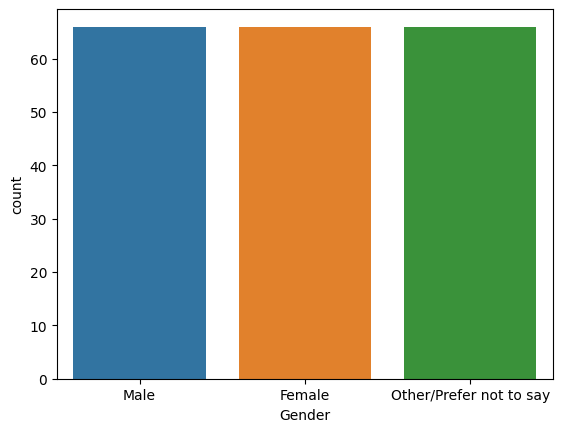

In [7]:
sns.countplot(x='Gender',data=data)
plt.show()

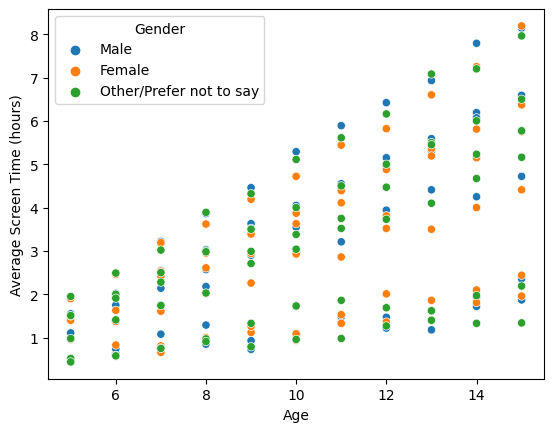

In [8]:
sns.scatterplot(x='Age',y='Average Screen Time (hours)',data=data,hue='Gender')
plt.show()

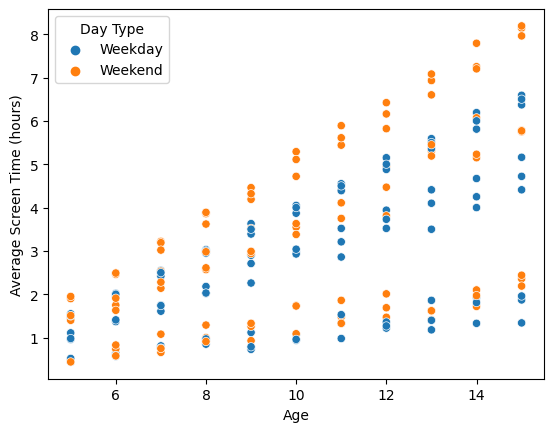

In [9]:
sns.scatterplot(x='Age',y='Average Screen Time (hours)',data=data,hue='Day Type')
plt.show()

/tmp/ipykernel_13/2800770915.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Screen Time Type',y='Average Screen Time (hours)',data=data,ci=None)


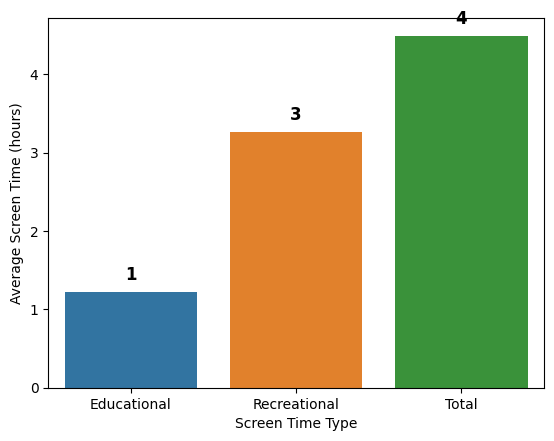

In [10]:
ax = sns.barplot(x='Screen Time Type',y='Average Screen Time (hours)',data=data,ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,  # X position
            p.get_height() + 0.1,         # Y position
            int(p.get_height()),          # Count value
            ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

In [11]:
data.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


/tmp/ipykernel_13/585942754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


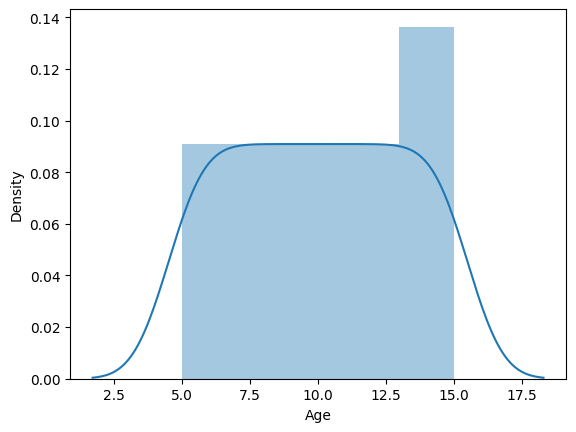

In [12]:
sns.distplot(data['Age'])
plt.show()

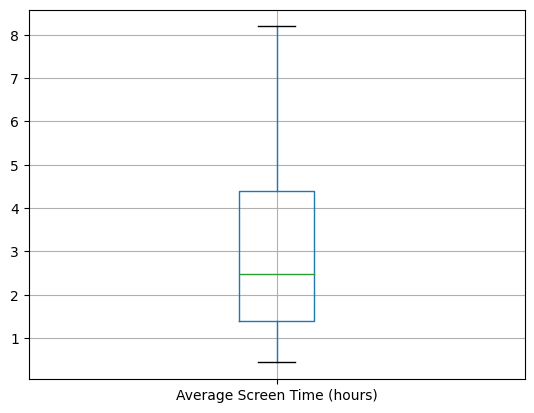

In [13]:
figure=data.boxplot(column="Average Screen Time (hours)")

In [14]:
data.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [15]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Gender")
LABEL_ENCODING("Screen Time Type")
LABEL_ENCODING("Day Type")
data.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,1,0,0,0.44,500
1,5,1,1,0,1.11,500
2,5,1,2,0,1.55,500
3,5,1,0,1,0.50,500
4,5,1,1,1,1.44,500


In [16]:
X = data.drop('Average Screen Time (hours)',axis=1)
y = data['Average Screen Time (hours)']


In [17]:
from sklearn.model_selection import train_test_split #split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 5)
(40, 5)
(158,)
(40,)


**LinearRegression**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))

In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_predict)
print("Accuracy: ",r2)

Accuracy:  0.8761177745726286


**Decision Tree Regressor**

In [22]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [23]:
dec_score = DTR.score(X_train,y_train)
print(dec_score)

0.852028477136659


In [24]:
dtr_score = DTR.score(X_test,y_test)
dtr_score

0.8562523148155177

**RandomForest Regressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=5,random_state=0)
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [26]:
rf = RF.score(X_train,y_train)
print(rf)

0.9953663857221627


In [27]:
rf_score = RF.score(X_test,y_test)
rf_score

0.9703410526597368

In [28]:
mylist=[]
mylist2=[]
mylist.append(r2)
mylist2.append("LinearRegression")
mylist.append(dtr_score)
mylist2.append("Decision Tree Regressor")
mylist.append(rf_score)
mylist2.append("RandomForest Regressor")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


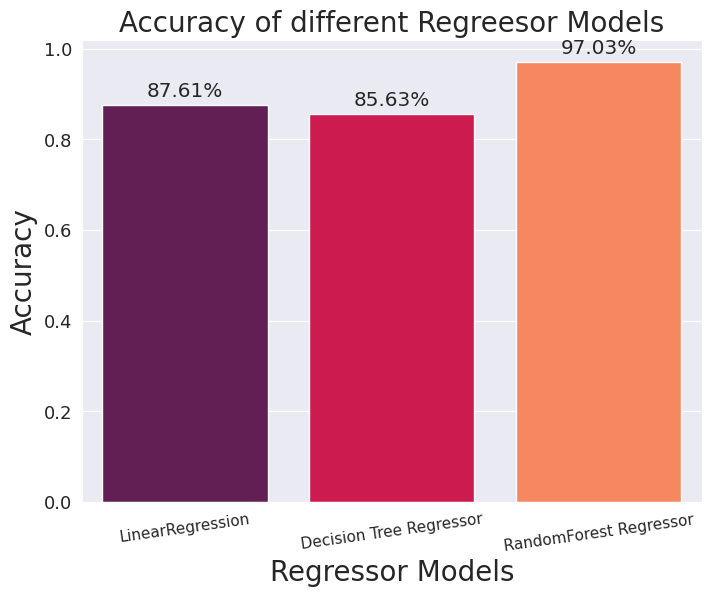

In [29]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Regressor Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Regreesor Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()
